* finding themes or latent topics in a collection of textual data is often referred to as topic modeling.
* finding a set of keywords or phrases that best represent and capture the meaning of the topic.

# BERTopic
* is a topic modeling technique that leverages clusters of semantically similar texts to extract various types of topic representations.

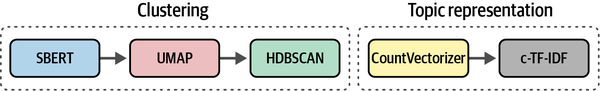

In [5]:
! pip install -U bertopic
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00


In [9]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
import pandas as pd
from umap.umap_ import UMAP
from hdbscan import HDBSCAN
from datasets import load_dataset

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [10]:
data=load_dataset("maartengr/arxiv_nlp")["train"]
data

README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/53.2M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['Titles', 'Abstracts', 'Years', 'Categories'],
    num_rows: 44949
})

In [11]:
titles,abstracts=data["Titles"],data["Abstracts"]

In [12]:
embed_mod_name="thenlper/gte-small"
embed_model=SentenceTransformer(embed_mod_name).cuda()

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [13]:
abstracts_embeddings=embed_model.encode(abstracts,show_progress_bar=True)

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [14]:
umap_model=UMAP(n_components=2,metric="cosine",min_dist=0.0,random_state=42)

In [15]:
abstracts_embeddings.shape

(44949, 384)

In [16]:
hdbscan_model=HDBSCAN(min_cluster_size=50)

In [17]:
topic_model=BERTopic(
    embedding_model=embed_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
).fit(abstracts,abstracts_embeddings)

2024-10-08 22:58:18,686 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-08 22:59:22,105 - BERTopic - Dimensionality - Completed ✓
2024-10-08 22:59:22,107 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-08 22:59:27,557 - BERTopic - Cluster - Completed ✓
2024-10-08 22:59:27,581 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-08 22:59:33,667 - BERTopic - Representation - Completed ✓


In [18]:
topic_model.get_topic_info()

Topic  Count                                           Name  \
0       -1  13092                               -1_the_of_and_to   
1        0   2386                   0_speech_asr_recognition_end   
2        1   1243          1_medical_clinical_biomedical_patient   
3        2   1057  2_summarization_summaries_summary_abstractive   
4        3    672             3_translation_nmt_machine_resource   
..     ...    ...                                            ...   
154    153     55       153_multimodal_sentiment_modality_fusion   
155    154     55           154_emoji_emojis_emoticons_sentiment   
156    155     53                 155_rumor_rumors_rumour_stance   
157    156     53          156_qe_estimation_quality_translation   
158    157     53           157_backdoor_attacks_attack_triggers   

                                        Representation  \
0        [the, of, and, to, in, we, that, for, on, is]   
1    [speech, asr, recognition, end, acoustic, audi...   
2    [medical, clinical, biomedical, patient, notes...   
3    [summarization, summaries, summary, abstractiv...   
4    [translation, nmt, machine, resource, parallel...   
..                                                 ...   
154  [multimodal, sentiment, modality, fusion, moda...   
155  [emoji, emojis, emoticons, sentiment, social, ...   
156  [rumor, rumors, rumour, stance, rumours, detec...   
157  [qe, estimation, quality, translation, mt, lev...   
158  [backdoor, attacks, attack, triggers, poisoned...   

                                   Representative_Docs  
0    [  Natural language processing (NLP) tasks ten...  
1    [  Recent research has shown that word embeddi...  
2    [  Distributed representations of medical conc...  
3    [  Document summarization provides an instrume...  
4    [  Neural Machine Translation (NMT) has obtain...  
..                                                 ...  
154  [  Multimodal sentiment analysis is an importa...  
155  [  The frequent use of Emojis on social media ...  
156  [  The scarcity and class imbalance of trainin...  
157  [  Most studies on word-level Quality Estimati...  
158  [  Deep neural networks (DNNs) and natural lan...  

[159 rows x 5 columns]

In [19]:
topic_model.get_topic(0)

[('speech', 0.027923119927238674),
 ('asr', 0.018352651650418127),
 ('recognition', 0.013196296763346022),
 ('end', 0.00979231797975602),
 ('acoustic', 0.009353694080097496),
 ('audio', 0.006927854130283199),
 ('spoken', 0.006568552624001388),
 ('speaker', 0.006460767938817995),
 ('model', 0.006175201285513478),
 ('the', 0.0061679151734871564)]

In [20]:
reduced_embed = umap_model.fit_transform(abstracts_embeddings)
reduced_embed.shape

(44949, 2)

In [21]:
# Visualiztion
fig=topic_model.visualize_documents(
    titles,reduced_embeddings=reduced_embed,width=1200,hide_annotations=True
)
fig.update_layout(font=dict(size=16))

In [22]:
from copy import deepcopy
original_topics=deepcopy(topic_model.topic_representations_)

## KeyBERTInspired

In [23]:
def topic_differences(model,original_topics,nbr_topics=5):
  df=pd.DataFrame(columns=["Topic","Original","Updated"])
  for i in range(nbr_topics):
    original_topic=" | ".join(list(zip(*original_topics[i]))[0][:5])
    updated_topic=" | ".join(list(zip(*(model.get_topic(i))))[0][:5])
    df.loc[len(df)]=[i,original_topic,updated_topic]
  return df

In [24]:
from bertopic.representation import KeyBERTInspired
representation_model=KeyBERTInspired()
topic_model.update_topics(abstracts,representation_model=representation_model)

In [25]:
topic_differences(topic_model,original_topics)

Topic                                           Original  \
0      0        speech | asr | recognition | end | acoustic   
1      1  medical | clinical | biomedical | patient | notes   
2      2  summarization | summaries | summary | abstract...   
3      3  translation | nmt | machine | resource | parallel   
4      4  lingual | cross | languages | multilingual | t...   

                                             Updated  
0   phonetic | language | speech | languages | voice  
1           nlp | ehr | clinical | ehrs | biomedical  
2  summarization | summarisation | summaries | su...  
3  translation | translating | monolingual | mult...  
4  multilingual | monolingual | bilingual | langu...

## Use LLM to get topic sentence

In [26]:
from transformers import pipeline
model_name="google/flan-t5-small"
pipe=pipeline("text2text-generation",model_name,device="cuda")

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [27]:
from bertopic.representation import TextGeneration
prompt="""I have a topic that contains the following documents:
[DOCUMENTS]
The topic is described by the following keywords: '[KEYWORDS]'.
Based on the documents and keywords, what is this topic about?"""
representation_model=TextGeneration(pipe,prompt=prompt,doc_length=50,tokenizer="whitespace")
topic_model.update_topics(abstracts,representation_model=representation_model)

100%|██████████| 159/159 [00:13<00:00, 12.18it/s]


In [28]:
topic_differences(topic_model,original_topics)

Topic                                           Original  \
0      0        speech | asr | recognition | end | acoustic   
1      1  medical | clinical | biomedical | patient | notes   
2      2  summarization | summaries | summary | abstract...   
3      3  translation | nmt | machine | resource | parallel   
4      4  lingual | cross | languages | multilingual | t...   

                          Updated  
0  Speech recognition |  |  |  |   
1        Science/Tech |  |  |  |   
2       Summarization |  |  |  |   
3        Science/Tech |  |  |  |   
4        Multilingual |  |  |  |

In [ ]:
# Visualize topics and documents
fig = topic_model.visualize_document_datamap(
    titles,
    topics=list(range(20)),
    reduced_embeddings=reduced_embed,
    width=1200,
    label_font_size=11,
    label_wrap_width=20,
    use_medoids=True,
)